In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [199]:
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('../data/thur_data.csv')

In [51]:
df.shape

(1170, 208)

In [13]:
df.head()

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,active,...,3yr On The Fly Starts/60,3yr Off. Zone Start %,3yr Off. Zone Faceoffs/60,3yr Neu. Zone Faceoffs/60,3yr Def. Zone Faceoffs/60,3yr Off. Zone Faceoff %,3yr Season_Player,skater,forward,IPP
0,257,Francois,Beauchemin,Defense,1980-06-04,2015,NaN,NaN,4500000,1.0,...,37.42,44.15,18.72,19.48,22.41,45.52,2014 Francois Beauchemin,1,0,37.10
1,257,Francois,Beauchemin,Defense,1980-06-04,2017,NaN,NaN,1000000,1.0,...,38.43,40.28,18.01,18.32,24.65,42.21,2016 Francois Beauchemin,1,0,31.58
2,355,Brent,Burns,Defense,1985-03-09,2017,21.0,Sharks,8000000,1.0,...,33.86,59.57,24.67,19.01,18.78,56.77,2015 Brent Burns,1,0,59.52
3,371,Zdeno,Chara,Defense,1977-03-18,2018,3.0,Bruins,5000000,1.0,...,38.14,35.86,15.98,18.46,26.87,37.29,2017 Zdeno Chara,1,0,31.17
4,375,Jason,Chimera,Left Wing,1979-05-02,2016,NaN,NaN,2250000,1.0,...,48.74,54.90,17.71,19.89,16.46,51.83,2015 Jason Chimera,1,1,76.92


In [24]:
df.drop('Position', axis=1, inplace=True)

In [26]:
defense = df[df.position == 'Defense']
forwards = df[df.position != 'Defense']

In [33]:
defense.set_index(defense['Season_Player'], inplace=True)
forwards.set_index(forwards['Season_Player'], inplace=True)

In [31]:
list(defense.columns)

['player_id',
 'first_name',
 'last_name',
 'position',
 'birthdate',
 'season',
 'team_id',
 'team_name',
 'cap_hit',
 'active',
 'signing_date',
 'signing_team',
 'length',
 'contract_level',
 'expiry_status',
 'contract_type',
 'contract_end',
 'ufa_year',
 'total_value',
 'Player',
 'signing_year',
 'signing_age',
 'signing_year_cap',
 'cap_pct',
 'signing_status',
 'year_match',
 'Season_Player',
 'Season',
 'GP',
 'TOI',
 'Goals',
 'Total Assists',
 'First Assists',
 'Second Assists',
 'Total Points',
 'Shots',
 'iCF',
 'iFF',
 'iSCF',
 'iHDCF',
 'Rush Attempts',
 'Rebounds Created',
 'PIM',
 'Total Penalties',
 'Minor',
 'Major',
 'Misconduct',
 'Penalties Drawn',
 'Giveaways',
 'Takeaways',
 'Hits',
 'Hits Taken',
 'Shots Blocked',
 'Faceoffs Won',
 'Faceoffs Lost',
 'Season_index',
 'sum GP',
 'sum TOI',
 'sum Goals',
 'sum Total Assists',
 'sum First Assists',
 'sum Second Assists',
 'sum Total Points',
 'sum Shots',
 'sum iCF',
 'sum iFF',
 'sum iSCF',
 'sum iHDCF',
 'sum Ru

In [14]:
from sklearn.cluster import KMeans

In [28]:
dkm = KMeans(n_clusters = 3)

In [39]:
defense.shape

(408, 208)

In [161]:
defense['mean Giveaways/60'] = (defense['sum Giveaways'] / defense['sum TOI']) * 60
defense['mean Takeaways/60'] = (defense['sum Takeaways'] / defense['sum TOI']) * 60
defense['mean Shots Blocked/60'] = (defense['sum Shots Blocked'] / defense ['sum TOI']) * 60
defense['mean TP/60'] = (defense['sum Total Points']/defense['sum TOI']) * 60

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [204]:
X = defense[['mean Total Points', 'mean TP/60', 'TOI/GP', '3yr CF/60 Rel', '3yr CA/60 Rel', 
             'mean Giveaways/60', 'mean Takeaways/60', '3yr Off.\xa0Zone Starts/60', 
             '3yr Def.\xa0Zone Starts/60', 'mean Shots Blocked/60']]
y = defense[['length', 'cap_hit']]

In [205]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [206]:
dclus = dkm.fit_transform(Xs)

In [207]:
dkm.cluster_centers_

array([[-0.02539245, -0.23542996,  0.27056509, -0.66120815,  0.82513603,
        -0.03402844, -0.12940585, -0.60543415,  0.77188709,  0.6695801 ],
       [ 1.82646365,  1.1356846 ,  1.31319537,  1.16851942, -0.65304522,
         0.31088503,  0.55594613,  0.64112665, -0.13009493, -0.40390343],
       [-0.54472877, -0.16435496, -0.62092137,  0.16347881, -0.45303214,
        -0.06913774, -0.06921787,  0.28231577, -0.57249957, -0.40660376]])

In [208]:
dkm.labels_

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0,
       1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0,
       1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2,
       1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0,
       0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 1,
       2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0,

In [209]:
X['cluster'] = dkm.labels_

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [210]:
dclus0 = X[dkm.labels_ == 0].drop('cluster', axis=1)

In [211]:
dclus1 = X[dkm.labels_ == 1].drop('cluster', axis=1)

In [212]:
dclus2 = X[dkm.labels_ == 2].drop('cluster', axis=1)

In [213]:
dc0means, dc1means, dc2means = dclus0.mean(axis=0), dclus1.mean(axis=0), dclus2.mean(axis=0)

In [214]:
dc0means.index

Index(['mean Total Points', 'mean TP/60', 'TOI/GP', '3yr CF/60 Rel',
       '3yr CA/60 Rel', 'mean Giveaways/60', 'mean Takeaways/60',
       '3yr Off. Zone Starts/60', '3yr Def. Zone Starts/60',
       'mean Shots Blocked/60'],
      dtype='object')

In [215]:
dc0means

mean Total Points          10.870130
mean TP/60                  0.686833
TOI/GP                     17.917232
3yr CF/60 Rel              -8.319156
3yr CA/60 Rel               6.564481
mean Giveaways/60           1.696462
mean Takeaways/60           0.762633
3yr Off. Zone Starts/60     7.518896
3yr Def. Zone Starts/60    11.421558
mean Shots Blocked/60       5.260908
dtype: float64

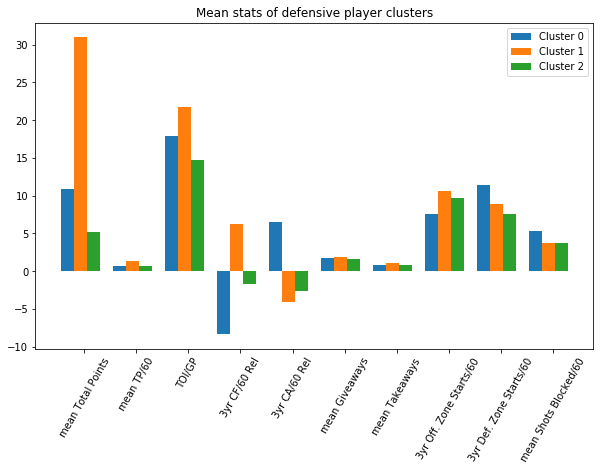

In [216]:
w = 0.25
idx = ('mean Total Points', 'mean TP/60', 'TOI/GP', '3yr CF/60 Rel', '3yr CA/60 Rel',
       'mean Giveaways', 'mean Takeaways', '3yr Off. Zone Starts/60',
       '3yr Def. Zone Starts/60', 'mean Shots Blocked/60')
xx = np.arange(len(idx))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.bar(x = xx - w, height = dc0means, width = w, label = 'Cluster 0')
ax.bar(x = xx, height = dc1means, width = w, label = 'Cluster 1')
ax.bar(x = xx + w, height = dc2means, width = w, label = 'Cluster 2')
ax.set_xticks(xx + w/3)
ax.set_xticklabels(idx, rotation = 60)


ax.legend()

ax.set_title('Mean stats of defensive player clusters')
plt.show()

In [217]:
dclus0.shape, dclus1.shape, dclus2.shape

((154, 10), (60, 10), (194, 10))

In [218]:
forwards['mean Giveaways/60'] = (forwards['sum Giveaways'] / forwards['sum TOI']) * 60
forwards['mean Takeaways/60'] = (forwards['sum Takeaways'] / forwards['sum TOI']) * 60
forwards['mean Shots Blocked/60'] = (forwards['sum Shots Blocked'] / forwards ['sum TOI']) * 60
forwards['mean TP/60'] = (forwards['sum Total Points']/forwards['sum TOI']) * 60

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [236]:
X = forwards[['mean Total Points', 'mean TP/60', 'TOI/GP', '3yr CF/60 Rel', '3yr CA/60 Rel', 
             'mean Giveaways/60', 'mean Takeaways/60', '3yr Off.\xa0Zone Starts/60', 
             '3yr Def.\xa0Zone Starts/60', 'mean Shots Blocked/60']]
y = forwards[['length', 'cap_hit']]

In [237]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [238]:
fkm = KMeans(n_clusters = 5)

In [239]:
fclus = fkm.fit_transform(Xs)

In [240]:
X['cluster'] = fkm.labels_

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [241]:
fkm.n_clusters

5

In [242]:
fclus = []
fcmeans = []
for i in range(fkm.n_clusters):
    fclus.append(X[fkm.labels_ == i].drop('cluster', axis=1))
    fcmeans.append(fclus[i].mean(axis=0))

In [243]:
fcmeans[0].index

Index(['mean Total Points', 'mean TP/60', 'TOI/GP', '3yr CF/60 Rel',
       '3yr CA/60 Rel', 'mean Giveaways/60', 'mean Takeaways/60',
       '3yr Off. Zone Starts/60', '3yr Def. Zone Starts/60',
       'mean Shots Blocked/60'],
      dtype='object')

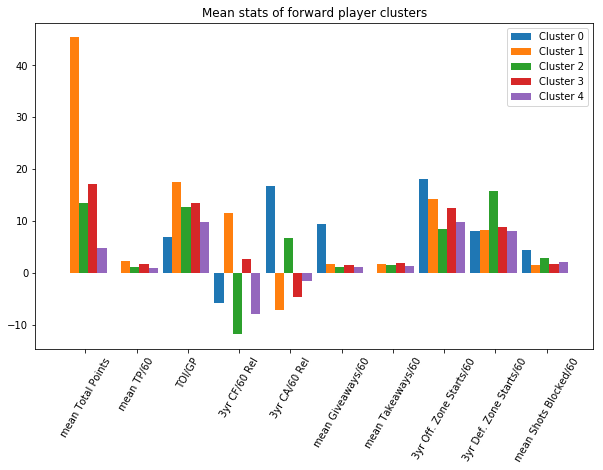

In [244]:
w = 0.18
idx = fcmeans[0].index

xx = np.arange(len(idx))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

#for i in fcmeans:
ax.bar(x = xx - 2*w, height = fcmeans[0], width = w, label = 'Cluster 0')
ax.bar(x = xx - w, height = fcmeans[1], width = w, label = 'Cluster 1')
ax.bar(x = xx, height = fcmeans[2], width = w, label = 'Cluster 2')
ax.bar(x = xx + w, height = fcmeans[3], width = w, label = 'Cluster 3')
ax.bar(x = xx + 2*w, height = fcmeans[4], width = w, label = 'Cluster 4')

ax.set_xticks(xx + w/5)
ax.set_xticklabels(idx, rotation = 60)


ax.legend()

ax.set_title('Mean stats of forward player clusters')
plt.show()

In [245]:
for i in fclus:
    print(i.shape)

(4, 10)
(155, 10)
(159, 10)
(208, 10)
(236, 10)


In [247]:
fclus[0]

,mean Total Points,mean TP/60,TOI/GP,3yr CF/60 Rel,3yr CA/60 Rel,mean Giveaways/60,mean Takeaways/60,3yr Off. Zone Starts/60,3yr Def. Zone Starts/60,mean Shots Blocked/60
Season_Player,,,,,,,,,,
2014 Oscar Lindberg,0.0,0.0,8.300000,13.10,3.92,7.228916,0.0,7.23,0.00,0.000000
2016 Nicolas Kerdiles,0.0,0.0,11.133333,1.85,24.84,10.778475,0.0,10.78,16.17,10.778475
2017 Nicolas Kerdiles,0.0,0.0,3.750000,-2.88,20.76,6.440083,0.0,16.10,16.10,6.440083
2016 Mike Liambas,0.0,0.0,4.700000,-35.70,17.06,12.765957,0.0,38.30,0.00,0.000000


In [248]:
fclus[1].sample(10)

,mean Total Points,mean TP/60,TOI/GP,3yr CF/60 Rel,3yr CA/60 Rel,mean Giveaways/60,mean Takeaways/60,3yr Off. Zone Starts/60,3yr Def. Zone Starts/60,mean Shots Blocked/60
Season_Player,,,,,,,,,,
2016 T.J. Oshie,54.000000,2.378139,17.854902,11.00,-3.09,1.556066,2.334099,14.09,10.61,2.216660
2016 Nikolaj Ehlers,51.000000,2.360073,17.486179,12.98,-9.91,2.036142,1.295726,13.49,6.87,1.226313
2014 Mika Zibanejad,33.000000,2.068680,16.437292,8.21,-8.53,1.086579,1.608973,16.93,6.90,1.525390
2017 James Neal,47.666667,2.133368,17.175117,10.88,-9.73,1.297923,2.058775,14.81,6.50,1.178574
2016 Mikael Granlund,50.666667,2.157273,18.824486,9.44,-2.78,1.376681,1.816651,11.38,9.48,2.157273
2016 Patrick Marleau,50.333333,1.980895,17.157724,13.46,-4.28,2.584347,1.784117,14.14,9.46,1.259377
2016 Jack Eichel,56.500000,2.452984,19.920219,14.18,-6.53,2.062244,1.758334,12.48,6.23,1.302470
2014 Mikael Granlund,29.333333,1.981783,17.896814,7.72,-1.49,1.306175,1.553898,12.12,6.89,2.229506
2017 Max Domi,45.000000,2.190320,16.706098,13.16,-7.92,2.255218,1.541336,15.01,6.70,1.200620


In [249]:
fclus[2].sample(10)

,mean Total Points,mean TP/60,TOI/GP,3yr CF/60 Rel,3yr CA/60 Rel,mean Giveaways/60,mean Takeaways/60,3yr Off. Zone Starts/60,3yr Def. Zone Starts/60,mean Shots Blocked/60
Season_Player,,,,,,,,,,
2014 Chris Mueller,2.333333,1.203035,10.452381,1.11,1.42,0.687449,1.203035,8.08,16.16,3.437243
2016 Nick Bonino,35.000000,1.750447,16.652292,-5.22,3.67,1.083610,2.117208,10.54,14.97,4.267757
2017 Colton Sceviour,23.666667,1.377661,13.439474,-12.39,7.81,1.591102,1.959772,8.79,14.34,3.589681
2017 Troy Brouwer,28.666667,1.412603,13.931360,-4.08,5.40,1.429029,1.478306,12.94,13.58,2.184608
2016 Stephen Gionta,10.000000,0.858395,11.207051,-12.63,5.11,0.715329,1.173140,6.81,12.73,2.403507
2017 Matt Calvert,21.000000,1.305759,13.376087,-11.84,7.41,0.829054,1.803192,8.56,14.53,2.383529
2014 Mark Letestu,24.666667,1.653888,13.338272,-10.43,4.73,0.603445,1.676237,10.42,17.12,1.363340
2017 Antoine Roussel,24.333333,1.486163,12.431735,-2.71,2.42,1.710105,1.262221,9.87,13.60,2.951967
2015 Brandon Tanev,0.000000,0.000000,12.044444,-0.01,26.64,0.000000,0.000000,9.96,21.59,3.321036


In [250]:
fclus[3].sample(10)

,mean Total Points,mean TP/60,TOI/GP,3yr CF/60 Rel,3yr CA/60 Rel,mean Giveaways/60,mean Takeaways/60,3yr Off. Zone Starts/60,3yr Def. Zone Starts/60,mean Shots Blocked/60
Season_Player,,,,,,,,,,
2014 Brock Nelson,34.000000,1.751599,15.883130,6.76,-7.23,1.545529,2.189499,12.11,9.12,2.318293
2016 Richard Panik,23.000000,1.712026,14.733740,1.78,-5.67,1.265411,1.637590,12.88,9.30,2.803753
2016 Andreas Athanasiou,21.500000,2.158333,13.464323,0.34,1.50,1.305039,1.405426,15.36,6.32,1.455620
2017 Alex Broadhurst,0.000000,0.000000,10.041667,29.39,-7.12,5.975114,5.975114,5.98,8.96,0.000000
2015 Chris Terry,11.000000,1.227793,11.274755,-4.89,1.54,1.599851,1.823086,12.60,8.14,1.637057
2014 Joel Ward,34.333333,1.878124,16.861789,-1.39,-1.34,0.966413,1.878124,10.94,11.21,2.425151
2015 Jonathan Marchessault,6.333333,1.932912,12.089259,12.87,-13.95,1.220787,1.220787,13.12,7.61,0.915590
2017 Chris Kunitz,32.666667,1.715766,11.946341,2.75,-4.78,1.750782,1.680751,13.41,8.95,1.593212
2014 Calle Jarnkrok,13.500000,1.446859,12.849324,-6.39,-3.68,0.643048,1.071747,13.02,10.24,1.339684


In [252]:
fclus[4].sample(10)

,mean Total Points,mean TP/60,TOI/GP,3yr CF/60 Rel,3yr CA/60 Rel,mean Giveaways/60,mean Takeaways/60,3yr Off. Zone Starts/60,3yr Def. Zone Starts/60,mean Shots Blocked/60
Season_Player,,,,,,,,,,
2016 Phil Varone,2.666667,0.993515,7.950000,-2.92,3.29,2.235409,1.490273,11.30,8.82,3.601493
2015 Max McCormick,4.000000,1.147409,10.458333,-4.62,-0.23,1.434261,2.294817,10.33,7.75,3.155373
2016 Logan Shaw,8.500000,0.862385,9.709091,-9.62,1.95,0.608742,1.572584,12.33,6.90,1.927683
2016 Michael Sgarbossa,3.333333,1.323141,11.153509,-5.00,-7.73,1.852398,0.793885,11.51,8.60,2.513969
2016 Christopher DiDomenico,0.000000,0.000000,11.016667,-3.69,-1.19,0.000000,0.000000,9.08,5.45,3.630862
2016 Josh Archibald,1.500000,1.583346,10.865000,-9.01,9.26,1.055564,0.000000,12.14,11.61,1.583346
2015 Ryan Dzingel,9.000000,1.667011,10.797778,-5.75,2.38,0.370447,1.111341,10.37,6.85,0.740894
2014 Adam Cracknell,3.000000,1.086884,9.947059,-2.29,-0.18,0.483060,1.690709,8.33,6.88,2.536063
2017 Stefan Matteau,1.333333,0.502337,8.202083,-0.52,-5.51,1.883765,1.130259,10.49,7.15,1.130259
